## Compare how well signals estimation works in the noise vs noiseless setting

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from models.ICA_EM import *
import importlib, sys
from models.metrics import *
from models.dgp import *
importlib.reload(sys.modules['models.ICA_EM'])

<module 'models.ICA_EM' from '/Users/marvinlob/Documents/coding/eth/semester_project/models/ICA_EM.py'>

In [7]:
n = 10000
J  = 6
I = J-1
random_seed = 10
causal_data = dgp(noise_dict={"loc" : 0, "scale" : 0}, prior={"loc" : 0, "scale" : 1/np.sqrt(2)})
Signals = np.random.laplace(loc= 0, scale = 1/np.sqrt(2), size=(n, J))
A = np.random.uniform(-3,3, size=(I,J))
X = np.dot(Signals, A.T) + np.random.normal(0, 1, size=(n, I))

In [16]:
causal_data.generate_data(n,I,J, random_state=12)
print(np.round(causal_data.mixing_matrix_observed,2))

[[ 1.    0.   -1.25 -2.7   0.   -0.  ]
 [-2.32  1.    5.02  7.79  2.46 -2.62]
 [ 0.    0.    0.    1.    0.    0.  ]
 [ 0.    0.    0.    0.57  1.   -0.58]
 [ 0.    0.    0.    0.    0.    1.  ]]


In [34]:
causal_data.generate_data(n,I,J, random_state=100)
VarEM_est = VarEM(max_iter=200, random_seed=0, true_A=A, tol=1e-5)
VarEM_est.fit(X, J)
VarEM_est_causal_data = VarEM(max_iter=200, random_seed=0, true_A=causal_data.mixing_matrix_observed ,tol=1e-5)
VarEM_est_causal_data.fit(causal_data.data_observed, J)
CausalVarEM_est = CausalVarEM(max_iter=200, random_seed=0, true_A=causal_data.mixing_matrix_observed, tol=1e-5, mode = "each")
CausalVarEM_est.fit(causal_data.data_observed, J)

Initializing A with true A + noise


Diff: 0.0019: 100%|██████████| 200/200 [00:44<00:00,  4.50it/s]


Estimating the signals


100%|██████████| 10000/10000 [00:00<00:00, 95574.02it/s]


Initializing A with true A + noise


Diff: 0.0018: 100%|██████████| 200/200 [00:45<00:00,  4.38it/s]


Estimating the signals


100%|██████████| 10000/10000 [00:00<00:00, 88617.74it/s]


Initializing A with true A + noise


Diff: 0.0589: 100%|██████████| 200/200 [00:45<00:00,  4.36it/s]


Estimating the signals


100%|██████████| 10000/10000 [00:00<00:00, 80151.35it/s]


### plot non causal setting

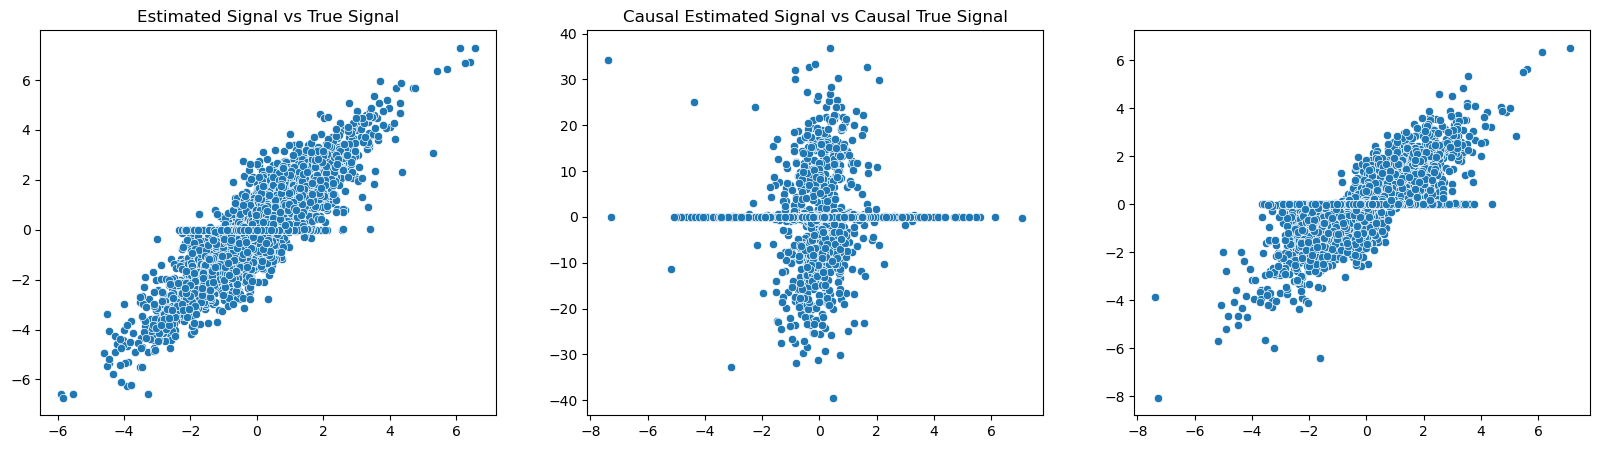

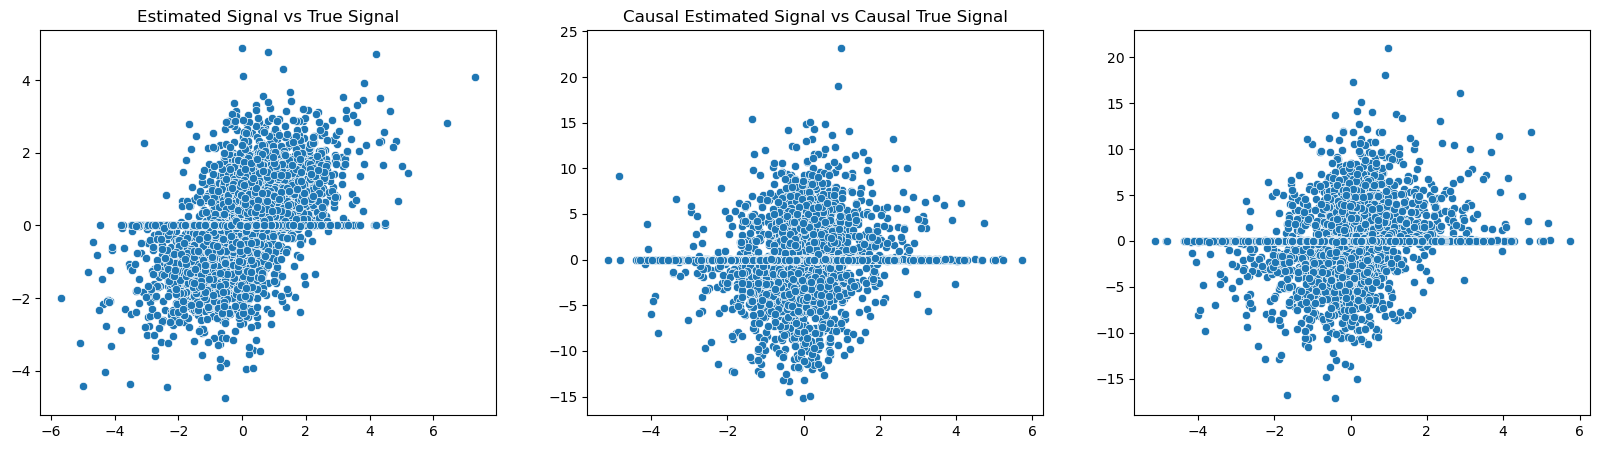

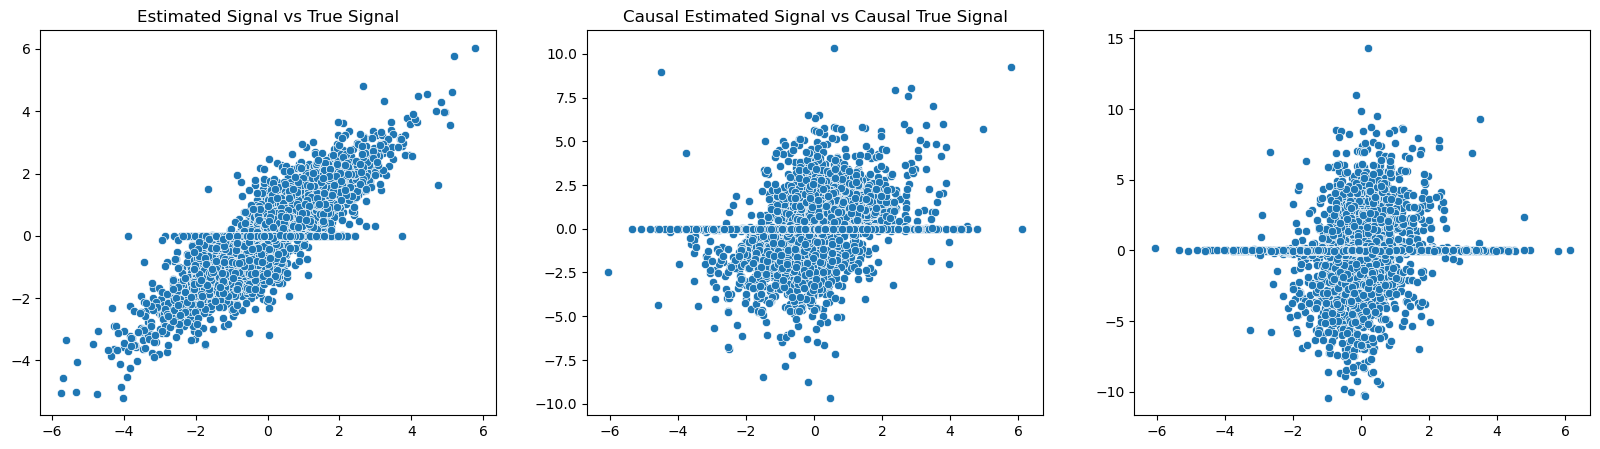

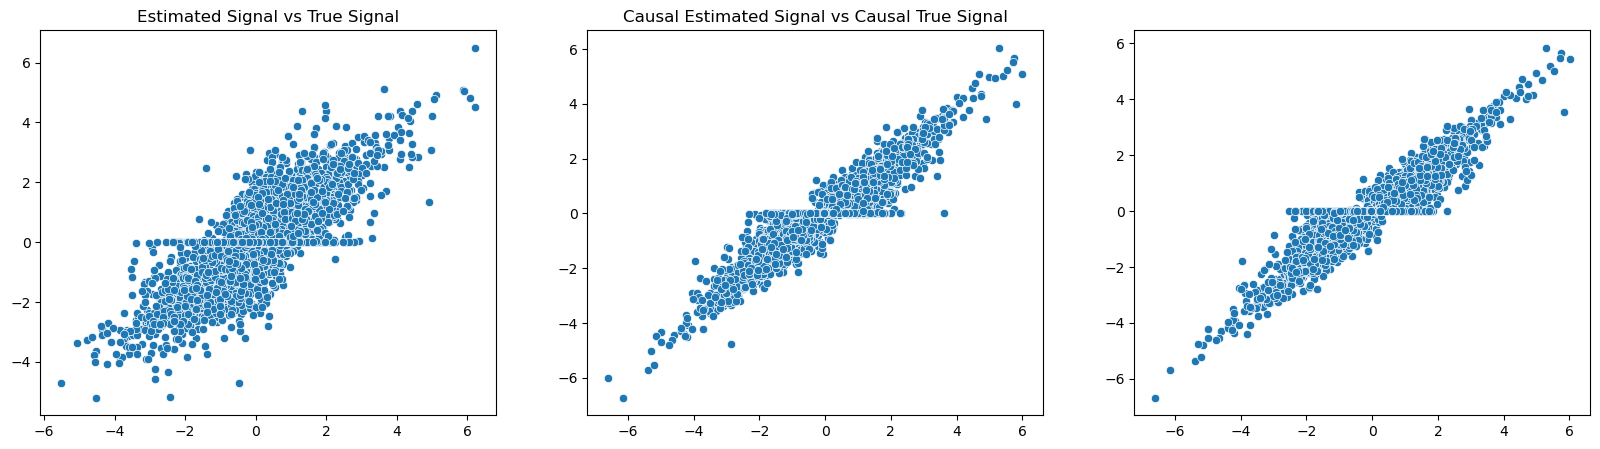

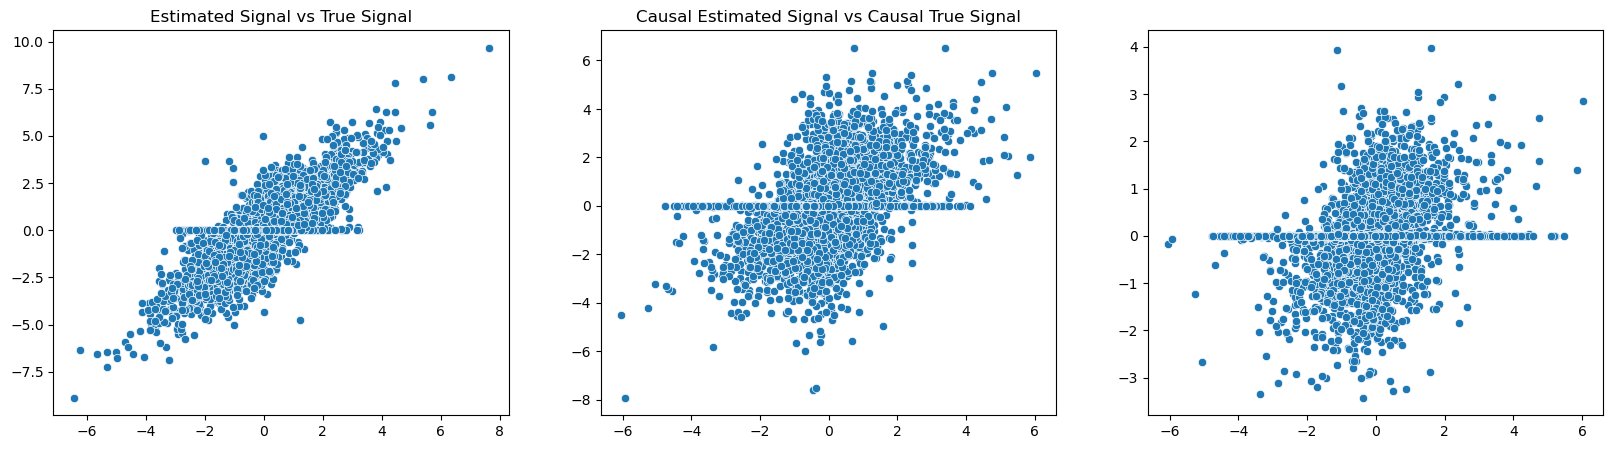

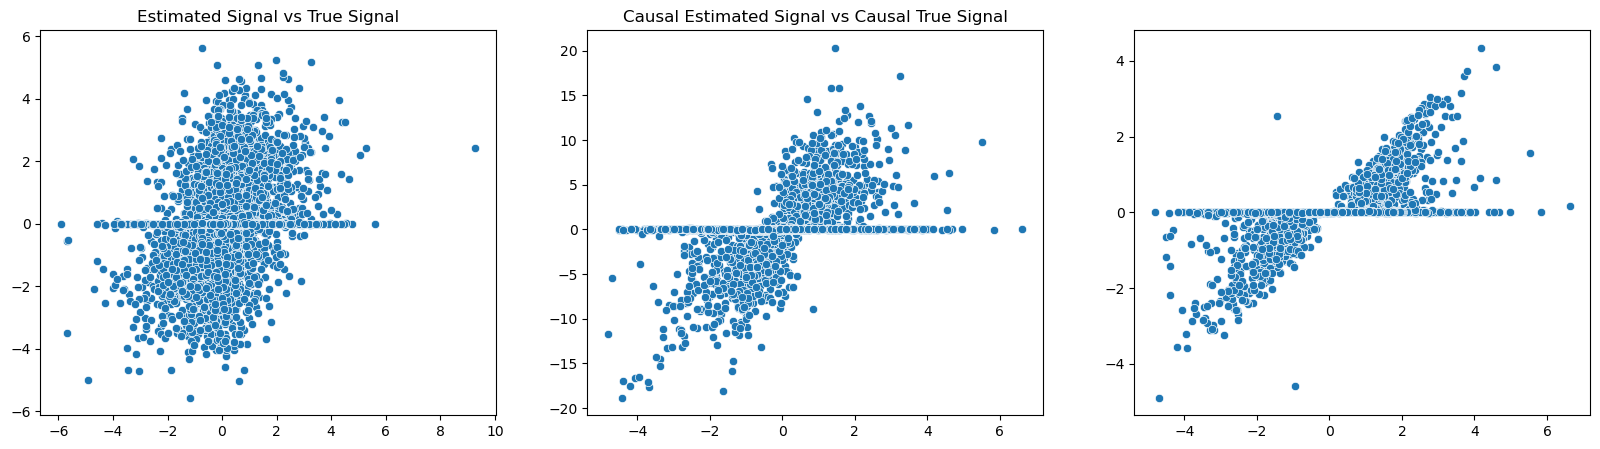

In [35]:
best_perm, score = f_score(VarEM_est.A, A)
var_signals = VarEM_est.Signals[:,best_perm]
best_perm, score = f_score(VarEM_est_causal_data.A, causal_data.mixing_matrix_observed)
var_signals_causal_data = VarEM_est_causal_data.Signals[:,best_perm]
best_perm, score = f_score(CausalVarEM_est.A, causal_data.mixing_matrix_observed)
causal_var_signals = CausalVarEM_est.Signals[:,best_perm]

for i in range(J):
    fig, ax = plt.subplots(1, 3, figsize=(20,5))
    # odering the signals
    best_perm, score = f_score(VarEM_est.A, A)
    sns.scatterplot(x = Signals[:,i], y = var_signals[:,i], ax = ax[0])
    sns.scatterplot(x = causal_data.signals[:,i], y = var_signals_causal_data[:,i], ax = ax[1])
    sns.scatterplot(x = causal_data.signals[:,i], y = causal_var_signals[:,i], ax = ax[2])
    ax[0].set_title("Estimated Signal vs True Signal")
    ax[1].set_title("Causal Estimated Signal vs Causal True Signal")

